## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [14]:
df = pd.read_csv("../data/QueryResults.csv").dropna()
df.columns = ['Time', 'Tag', 'Posts']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [15]:
print(df.head())
# print("-----------")
# print(df.tail())

                  Time         Tag  Posts
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [16]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [17]:
df.count()

Time     1991
Tag      1991
Posts    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [24]:
df.groupby("Tag").sum(numeric_only=True)

,Posts
Tag,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [25]:
df.groupby("Tag").count()

,Time,Posts
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [27]:
type(df['Time'][1])

str

In [28]:
df['Time'] = pd.to_datetime(df['Time'])
df.head()

,Time,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [43]:
reshaped_df = df.pivot(index="Time", columns="Tag", values="Posts")
reshaped_df.fillna(0, inplace=True)
reshaped_df.isna().values.any()

False

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [40]:
reshaped_df.shape

(145, 14)

In [41]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [42]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Time,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [44]:
reshaped_df.count()

Tag
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

Since I replaced NaN with 0, the count is the same; however, this is not accurate since some months had zero posts. For an accurate number, count the DF with NaN included.

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [61]:
import matplotlib.pyplot as plt

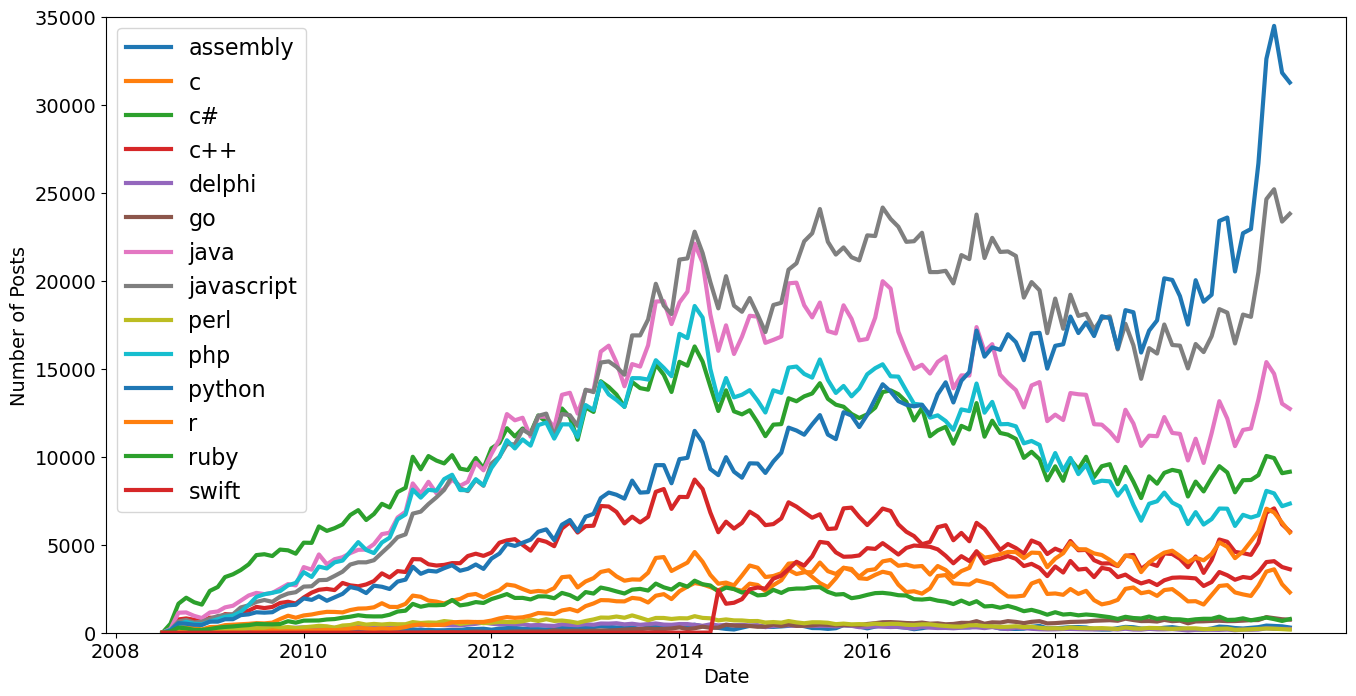

In [70]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [78]:
roll_df = reshaped_df.rolling(window=12).mean()

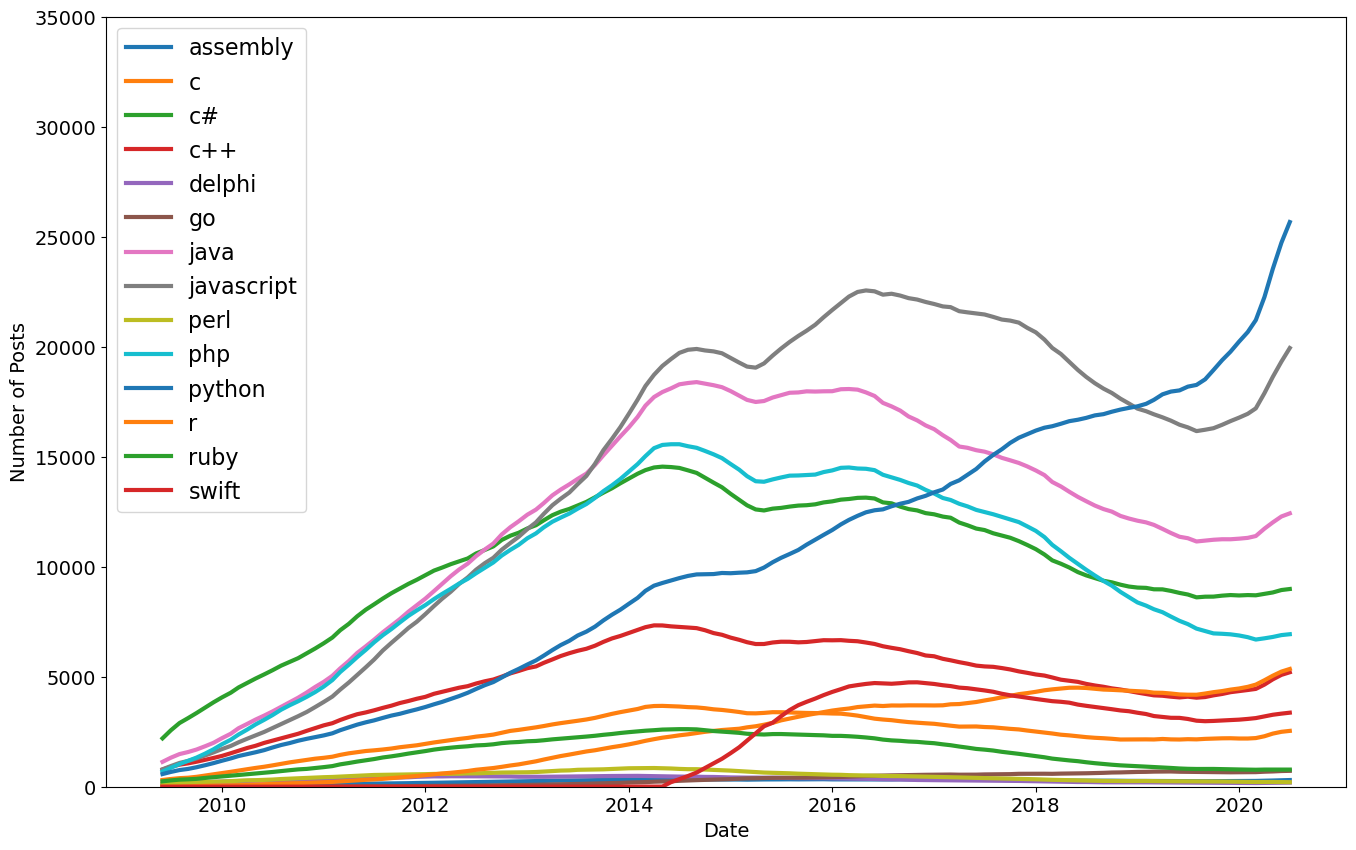

In [79]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)